In [1]:
import torch
import multiKrum
import geometricMedian
import aggNet_Blocks 
import nnsort

In [2]:
net=multiKrum.Net('krum')
net1=multiKrum.Net('mkrum')

net2=geometricMedian.Net()
netn=aggNet_Blocks.Net(1,10)
netn.load_state_dict(torch.load('./aggNet/aggNetBlock_cifar_dirichlet_dim1_32.pt'))
netm=torch.median
nets=nnsort.Net(1,10)
nets.load_state_dict(torch.load('./aggNet/irlsNeuralSort_dim1_9.pt'))
netfedavg=torch.mean

In [3]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

In [4]:
from sklearn.datasets import make_blobs


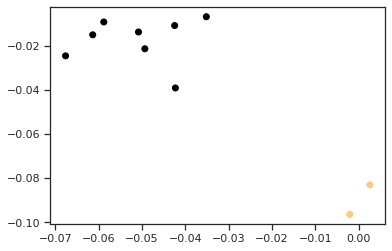

In [5]:
# n=10
# #x=torch.rand(1,2,n)-0.5
# X, y = make_blobs(n_samples=[int(n*0.8),n-int(n*0.8)], n_features=10000,
#                   center_box=(-0.1,0.1),cluster_std=0.01)
# x=torch.Tensor(X).permute([1,0]).view(1,-1,n)

# plt.scatter(X[:,0],X[:,1],c=y,cmap='copper')

In [149]:
# paramfloat

['conv1.weight',
 'layer1.0.conv1.weight',
 'layer1.0.conv2.weight',
 'layer1.1.conv1.weight',
 'layer1.1.conv2.weight',
 'layer2.0.conv1.weight',
 'layer2.0.conv2.weight',
 'layer2.1.conv1.weight',
 'layer2.1.conv2.weight',
 'layer3.0.conv1.weight',
 'layer3.0.conv2.weight',
 'layer3.1.conv1.weight',
 'layer3.1.conv2.weight',
 'layer4.0.conv1.weight',
 'layer4.0.conv2.weight',
 'layer4.1.conv1.weight',
 'layer4.1.conv2.weight']

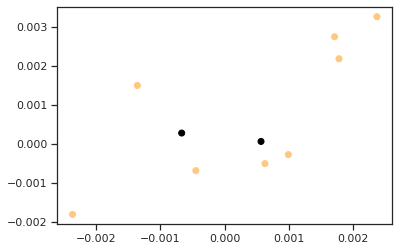

In [156]:
path='./AggData/train_noiid_cifar'
attack='backdoor_2'
rounds=0
path_to_data=f'{path}/{attack}/FedAvg_{rounds}.pt'
label=torch.load(f'{path}/{attack}/label.pt')
data=torch.load(path_to_data)
# data_=data['conv1.weight'].unsqueeze(0)
import utils
paramfloat=utils.getFloatSubModules(data)
# data_=data['layer1.0.conv1.weight'].unsqueeze(0)
# params=[param for param in paramfloat if 'conv' in param]
# params=['layer1.0.bn1.running_var']
params=paramfloat
data_=torch.cat(list(map(lambda x: data[x],params))).unsqueeze(0)[:,:100000,:]
X=data_.permute([0,2,1]).view(10,-1).cpu().detach().numpy()
x=torch.Tensor(X).permute([1,0]).view(1,-1,n)
y=label
# plot first 2 dimensions
plt.scatter(X[:,0],X[:,1],c=y,cmap='copper')

(-1.0022237092256545,
 1.5931064277887341,
 -0.694276800751686,
 0.8613338977098464)

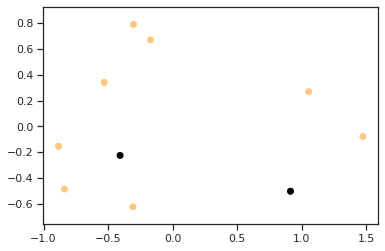

In [157]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_=pca.transform(X)
plt.scatter(X_[:,0],X_[:,1],c=y,cmap='copper')
plt.axis('equal')

In [95]:
# data_.unsqueeze(0)

In [76]:
# plt.scatter(x[:,0,:],x[:,1,:],c=y)

In [77]:
z=net(x)
z1=net1(x)
w=net2(x)
pn=netn.forward_n(x.reshape(-1,1,n),n)[2].reshape(1,-1,1)
me=netm(x,2,keepdims=True)[0]
nf=netfedavg(x,2,keepdims=True)
ns=nets(x)[1].reshape(1,-1,1).detach().numpy()


In [78]:
X.shape

(10, 100000)

In [79]:
def getTransformed(x):
    return pca.transform(x.reshape(1,-1)).reshape(1,2,1)
    

In [80]:
z= getTransformed(z)
z1=getTransformed(z1)
w=getTransformed(w)
pn=getTransformed(pn)
ns=getTransformed(ns)
nf=getTransformed(nf)

In [81]:
z.shape


(1, 2, 1)

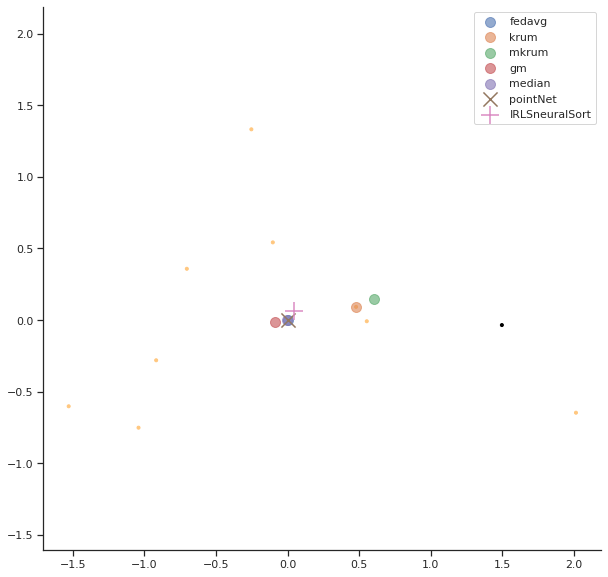

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
s=100
ax.scatter(X_[:,0],X_[:,1],c=y,alpha=1.0,marker='.',cmap='copper')
ax.scatter(nf[:,0,:],nf[:,1,:], s=s,alpha=0.6,label='fedavg')
ax.scatter(z[:,0,:],z[:,1,:], s=s,alpha=0.6,label='krum')
ax.scatter(z1[:,0,:],z1[:,1,:], s=s, alpha=0.6,label='mkrum')
ax.scatter(w[:,0,:],w[:,1,:], s=s,alpha=0.6, label='gm')
ax.scatter(me[:,0,:],me[:,1,:],marker='o', s=s,alpha=0.6,label='median')
ax.scatter(pn[:,0,:],pn[:,1,:],marker='x', s=2*s,label='pointNet')
ax.scatter(ns[:,0,:],ns[:,1,:],marker='+', s=3*s,label='IRLSneuralSort')

# ax.set_aspect('equal')
ax.axis('equal')
# ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0)
plt.legend()